In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
import torch
import torch.nn.functional as F
import numpy as np
from tqdm import tqdm_notebook

import fannypack
from lib import panda_datasets, panda_baseline_models, panda_baseline_training


In [5]:
print("Creating model...")
model = panda_baseline_models.PandaLSTMModel(batch_size=16)
buddy = fannypack.utils.Buddy("lstm_test", model)

Creating model...
[buddy-lstm_test] Using device: cpu
[buddy-lstm_test] Loaded checkpoint from path: checkpoints/lstm_test-0000000000034756.ckpt


In [6]:
print("Creating dataset...")
dataset = panda_datasets.PandaParticleFilterDataset(
    'data/pushset_medium.hdf5', subsequence_length=16)

Creating dataset...
Parsed data: 2344 active, 156 inactive
Keeping (inactive): 156


In [10]:
print("Training...")
dataloader = torch.utils.data.DataLoader(
    dataset, batch_size=16, shuffle=True, num_workers=2, drop_last=True)
for _ in tqdm_notebook(range(200)):
    for batch_idx, batch in enumerate(tqdm_notebook(dataloader)):
        _, states, observations, _ = batch

        model.reset_hidden_states(states[:, 0, :])
        predicted_states = model(observations)

        loss = F.mse_loss(predicted_states, states)
        buddy.minimize(loss, checkpoint_interval=500)
        buddy.log("loss", loss)

buddy.save_checkpoint()

Training...


KeyboardInterrupt: 

In [7]:
eval_trajectories = panda_datasets.load_trajectories("data/pushset_small.hdf5")

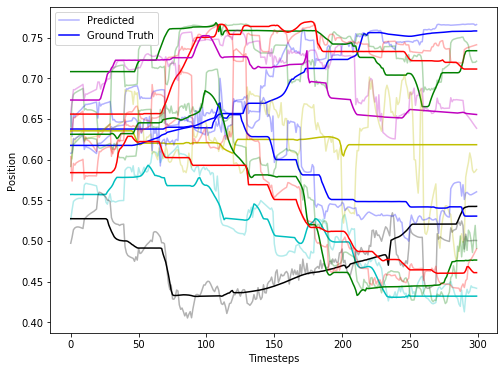

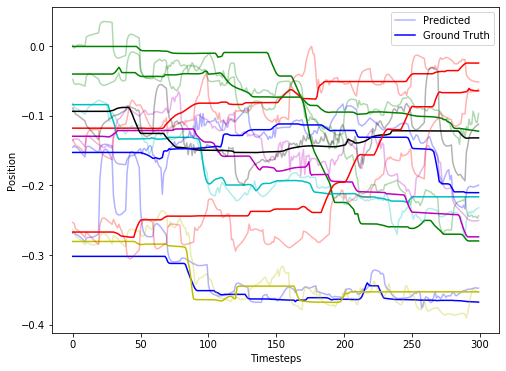

X RMSE:  0.028026777716102878
Y RMSE:  0.029697468753831634


In [8]:
pred, actual = panda_baseline_training.rollout_lstm(model, eval_trajectories)
panda_baseline_training.eval_rollout(pred, actual, plot=True)

In [13]:
buddy.save_checkpoint()

[buddy-lstm_test] Skipping redundant checkpoint save
